In [75]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [76]:
df= pd.read_csv("boston.csv")
df.shape
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [77]:
df.columns
df=df.fillna(0)

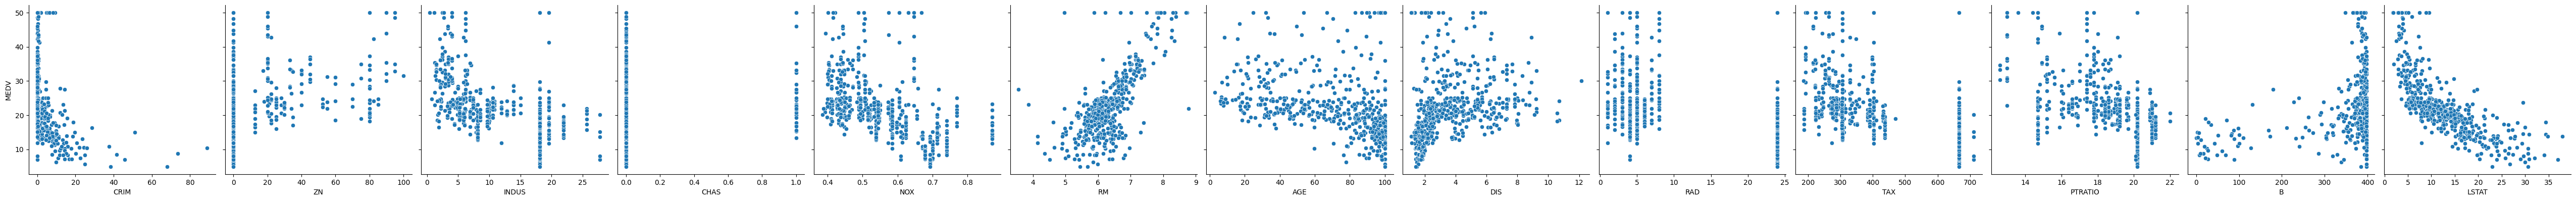

In [78]:
import seaborn as sns
sns.pairplot(df, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV', height=4, aspect=1, kind='scatter')
plt.show()

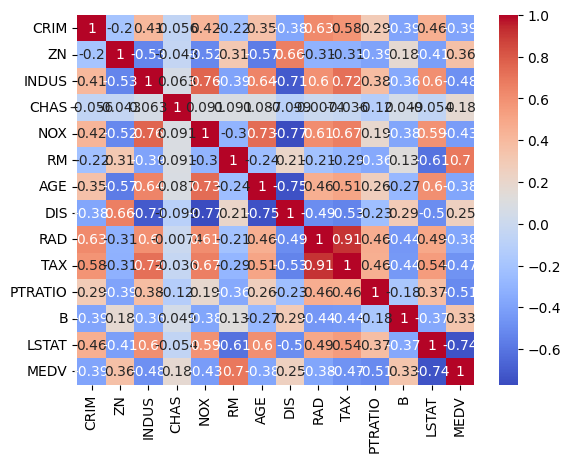

In [79]:
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')
plt.show()

In [80]:
X=df.drop(["MEDV","CHAS"],axis=1)
Y=df["MEDV"]
Y=Y.values.reshape(-1,1)

In [81]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
x_train,x_test,y_test,y_train=train_test_split(X,Y,test_size=0.50,random_state=22)
print(x_train.shape)
print(y_train.shape)

(253, 12)
(253,)


In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#y_train =scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)
#x_test

In [124]:
from sklearn.ensemble import RandomForestClassifier
n_range=range(80,150,5)
#criterion=['gini','entropy']
score=[]
for k in n_range:
#  for cr in criterion:
    clf=RandomForestClassifier(n_estimators=k,criterion='gini',max_depth=19)
    clf.fit(x_train,y_train)
    pre=clf.predict(x_test)
#score=accuracy_score(y_test,pre)*100
    score.append(accuracy_score(y_test,pre)*100)
score_csv=pd.Series(score)*100
print(score_csv)
print(score_csv.max())
#print(score)


0      79.051383
1       0.000000
2      39.525692
3      79.051383
4      39.525692
5      79.051383
6     118.577075
7       0.000000
8       0.000000
9      79.051383
10     79.051383
11     79.051383
12     79.051383
13     79.051383
dtype: float64
118.5770750988142


In [125]:
from sklearn.ensemble import RandomForestClassifier
n_range=range(80,150,5)
#criterion=['gini','entropy']
score=[]
for k in n_range:
#  for cr in criterion:
    clf=RandomForestClassifier(n_estimators=k,criterion='entropy',max_depth=19)
    clf.fit(x_train,y_train)
    pre=clf.predict(x_test)
#score=accuracy_score(y_test,pre)*100
    score.append(accuracy_score(y_test,pre)*100)
score_csv=pd.Series(score)*100
print(score_csv)
print(score_csv.max())
#print(score)

0      79.051383
1      79.051383
2      79.051383
3      39.525692
4      79.051383
5     118.577075
6      79.051383
7      39.525692
8      79.051383
9      79.051383
10     79.051383
11     79.051383
12     79.051383
13     79.051383
dtype: float64
118.5770750988142


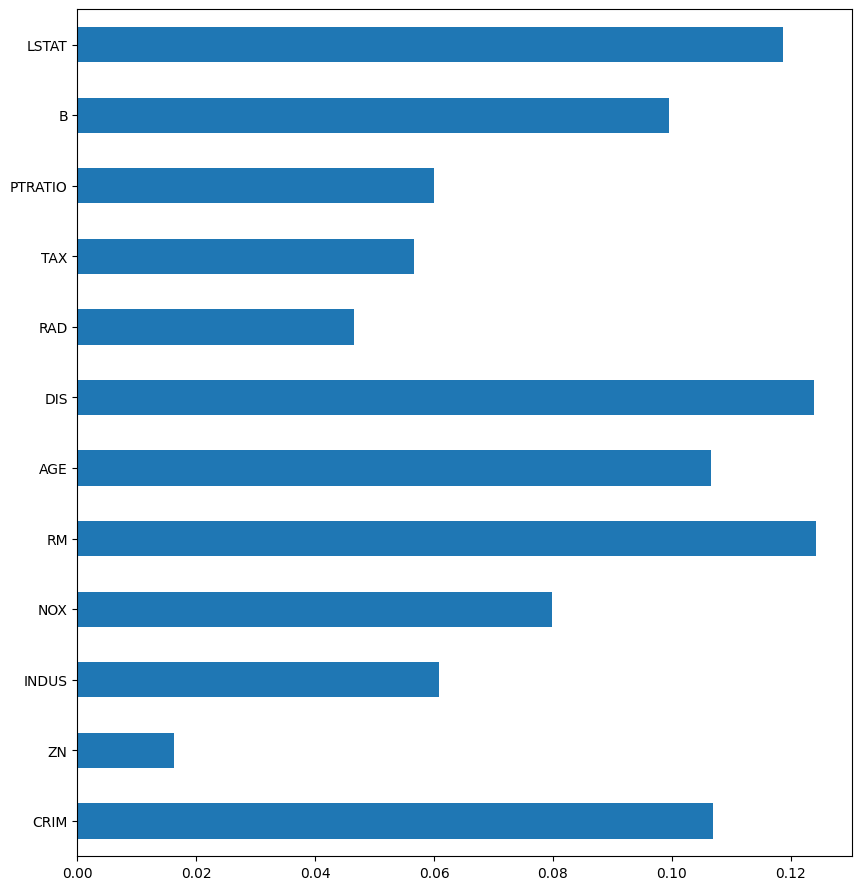

In [126]:
clf.feature_importances_
fea_imp=pd.Series(clf.feature_importances_,index=X.columns)
fea_imp.sort_values()
fea_imp.plot(kind="barh",figsize=(10,11));

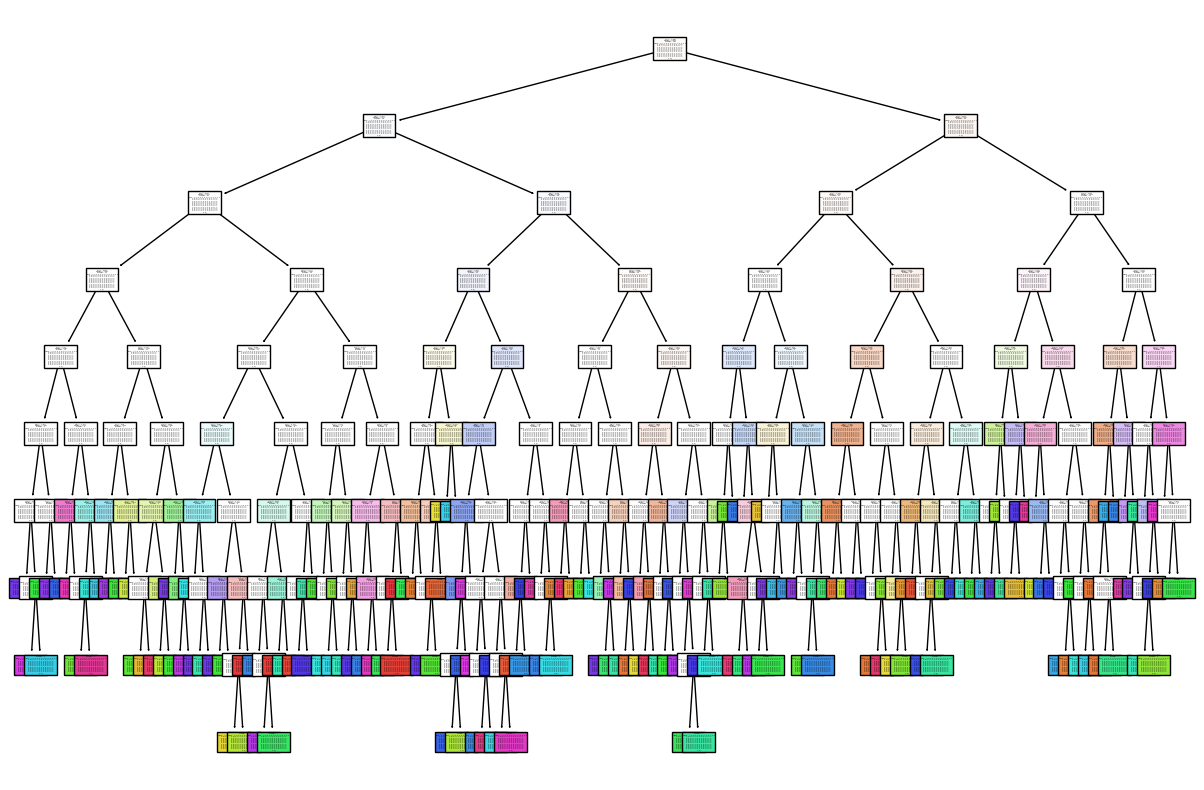

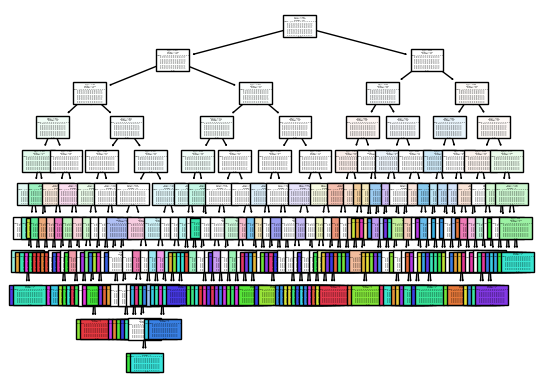

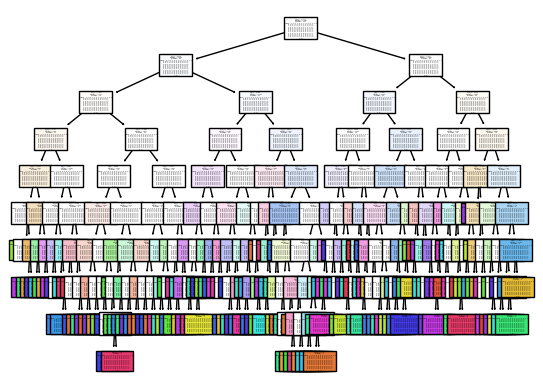

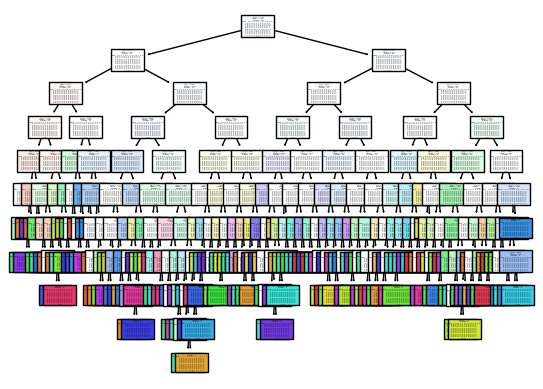

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
for i in range(len(clf.estimators_)):
    tree.plot_tree(clf.estimators_[i],filled=True)
    plt.show()